In [1]:
#importing required libraries from python
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import ttest

In [2]:
#importing read files to read out the data from the excel file
from pandas import read_excel
df = pd.read_excel('Assignment-I.xlsx')
df

,Students,Pre_statistics,Post_statistics
0,A,42,92
1,B,41,75
2,C,50,93
3,D,37,97
4,E,33,65
5,F,48,78
6,G,44,94
7,H,58,91
8,I,49,84
9,J,53,81


# Q1. What type of data is it? -Discrete data type(Numerical)

# Q2. Null hypothesis(H0): There is no difference after his Class
#    Alternate hypothesis(H1): There is a difference after the class

In [4]:
df['difference']=df['Post_statistics']-df['Pre_statistics']
df
#we define the difference column and the method to calculate it Post-Pre or Pre-post

,Students,Pre_statistics,Post_statistics,difference
0,A,42,92,50
1,B,41,75,34
2,C,50,93,43
3,D,37,97,60
4,E,33,65,32
5,F,48,78,30
6,G,44,94,50
7,H,58,91,33
8,I,49,84,35
9,J,53,81,28


In [5]:
pg.normality(df)
#Calling the normality method from the pingouin library for our dataframe to get the pval and normality status.

,W,pval,normal
Pre_statistics,0.981553,0.905028,True
Post_statistics,0.953257,0.276061,True
difference,0.957720,0.348664,True


<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

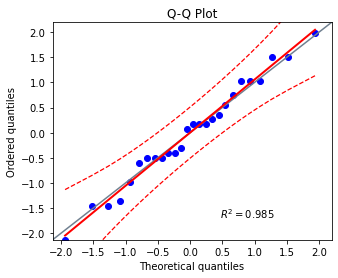

In [6]:
pg.qqplot(df['Pre_statistics'], dist='norm')
#qqplot for Pre data points

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

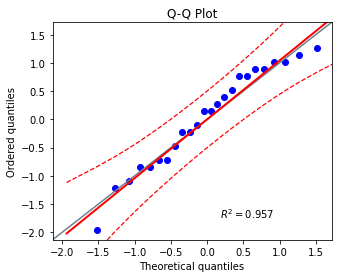

In [7]:
pg.qqplot(df['Post_statistics'], dist='norm')
#qqplot for Post data points

# Q4. We create a QQ plot to see the difference is normally distributed or not? -Yes it is

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

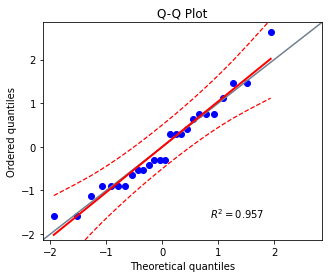

In [8]:
pg.qqplot(df['difference'], dist='norm')
#quantile plot for our "difference" column is showing us it is normally distributed (which is our assumption is correct).

{'whiskers': [<matplotlib.lines.Line2D at 0x221fe5a3bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x221fe5af2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x221fe5a3850>,
 'medians': [<matplotlib.lines.Line2D at 0x221fe5af970>,
 'fliers': [<matplotlib.lines.Line2D at 0x221fe5afcd0>,
 'means': []}

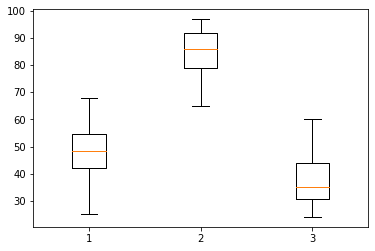

In [13]:
plot=[df['Pre_statistics'],df['Post_statistics'],df['difference']]
plt.boxplot(plot)
#attempt to show the contrast among the three column in boxplot and difference of the variable along with the data points.

(array([1., 1., 0., 2., 4., 4., 3., 2., 6., 3.]),
 array([65. , 68.2, 71.4, 74.6, 77.8, 81. , 84.2, 87.4, 90.6, 93.8, 97. ]),
 <BarContainer object of 10 artists>)

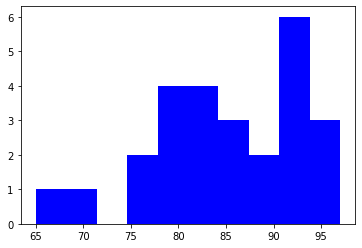

In [16]:
plt.hist(df['Post_statistics'],color='blue')
#histogram for Post_stat score data points

(array([1., 3., 1., 4., 3., 5., 3., 3., 2., 1.]),
 array([25. , 29.3, 33.6, 37.9, 42.2, 46.5, 50.8, 55.1, 59.4, 63.7, 68. ]),
 <BarContainer object of 10 artists>)

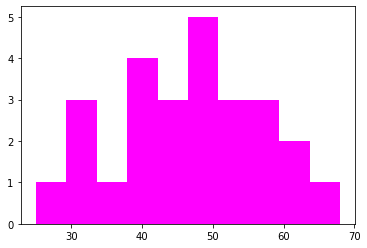

In [15]:
plt.hist(df['Pre_statistics'],color='magenta')
#histogram for Pre_stat score

(array([2., 5., 4., 3., 4., 4., 1., 2., 0., 1.]),
 array([24. , 27.6, 31.2, 34.8, 38.4, 42. , 45.6, 49.2, 52.8, 56.4, 60. ]),
 <BarContainer object of 10 artists>)

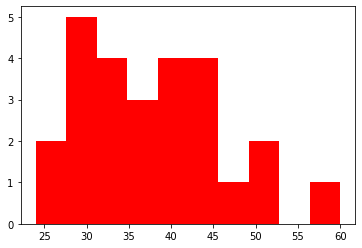

In [14]:
plt.hist(df['difference'],color='red')
# we can see here the data is normally distributed and hence we can perform our ttest on paired variables

# Q6. Best plot to see the difference between the after and before session .

In [19]:
data=[df['Pre_statistics'],df['Post_statistics']]
#to show the contrast between the pre_statistics score and Post_statistics score ,we store into data variable

{'whiskers': [<matplotlib.lines.Line2D at 0x221fe799070>,
 'caps': [<matplotlib.lines.Line2D at 0x221fe799670>,
 'boxes': [<matplotlib.lines.Line2D at 0x221fe789d30>,
 'medians': [<matplotlib.lines.Line2D at 0x221fe799d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x221fe7a50d0>,
 'means': []}

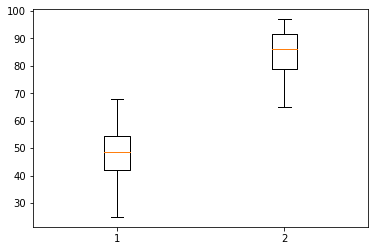

In [20]:
plt.boxplot(data)
#calling the matplotlib and argument as data variable created above.

In [21]:
# Creating short hand variable for the dataset or data points from the dataset and storing it in these variable.
Pre=df['Pre_statistics']
Post=df['Post_statistics']
diff=df['difference']

# Q3. Using Shapiro wil test we calculate that the difference of the variable is normally distributed or not?

In [25]:
from scipy.stats import shapiro

In [26]:
shapiro(diff)
#Important for our study 

ShapiroResult(statistic=0.9577199220657349, pvalue=0.3486637473106384)

### It is clear from the graph and shapiro test that our p-value is not significant >0.05 .Therefore, We failed to reject the Null Hypothesis(H0) i.e There is no difference after and before session.

In [27]:
shapiro(Pre)

ShapiroResult(statistic=0.9815525412559509, pvalue=0.9050275087356567)

In [28]:
shapiro(Post)

ShapiroResult(statistic=0.9532567858695984, pvalue=0.2760609984397888)

# Q5. Measure of Central tendency and Dispersion of data points and difference of the variable

In [29]:
Pre.mean()

47.23076923076923

In [30]:
Pre.std()

10.648221231013911

In [31]:
Post.mean()

84.76923076923077

In [32]:
Post.std()

8.208813275048676

We are only interested in "difference" column for paired t-test.the mean and standard deviation of the difference column are:

In [33]:
diff.mean()

37.53846153846154

In [34]:
diff.std()

8.668244432320858

In [35]:
df.describe()
#Describe function will give the detail view of our dataset like count,min,max etc.

,Pre_statistics,Post_statistics,difference
count,26.000000,26.000000,26.000000
mean,47.230769,84.769231,37.538462
std,10.648221,8.208813,8.668244
min,25.000000,65.000000,24.000000
25%,42.000000,79.000000,30.500000
50%,48.500000,86.000000,35.000000
75%,54.500000,91.750000,43.750000
max,68.000000,97.000000,60.000000


# Q7.Every parameter of ttest value like CI,Test value,pval,degree of freedom etc.

In [24]:
#Applying the Paired ttest using the two dependent variables Pre and Post.
pg.ttest(Pre,Post,paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-22.081674,25,two-sided,6.466640e-18,"[-41.04, -34.04]",3.948473,6.797e+14,1.0
